              precision    recall  f1-score   support

           0       0.78      0.50      0.61       285
           1       0.71      0.90      0.79       392

    accuracy                           0.73       677
   macro avg       0.74      0.70      0.70       677
weighted avg       0.74      0.73      0.71       677

[[142 143]
 [ 41 351]]
[[142 143]
 [ 41 351]]


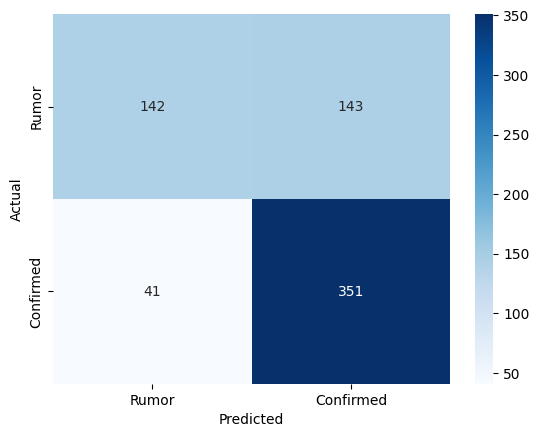

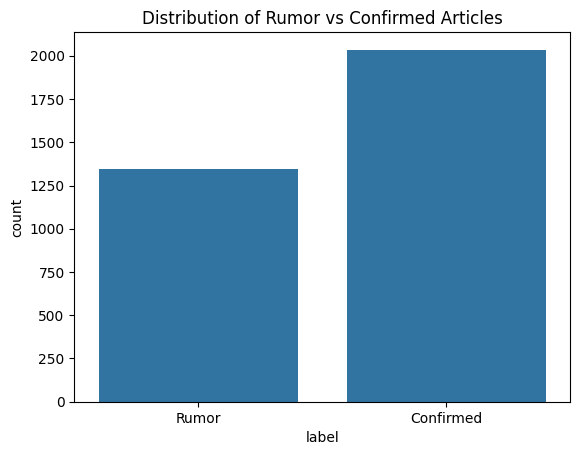

In [3]:
import pandas as pd

data = pd.read_csv('90minFootballTransferNewsNLP.csv', on_bad_lines='skip', encoding='utf-8')

data.head()


data['text'] = data['Title'].fillna('') + ' ' + data['Content'].fillna('')

import string

data['text'] = data['text'].str.lower()
data['text'] = data['text'].str.replace(f"[{string.punctuation}]", "", regex=True)


rumor_keywords = ['linked to', 'reportedly', 'rumor', 'interest from']
confirmed_keywords = ['signed', 'joined', 'completed', 'officially']


def label_article(text):
    text = text.lower()
    if any(word in text for word in rumor_keywords):
        return 0
    elif any(word in text for word in confirmed_keywords):
        return 1
    else:
        return -1

data['label'] = data['text'].apply(label_article)

data = data[data['label'] != -1]

data['label'].value_counts()

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['text'])


y = data['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rumor', 'Confirmed'],
            yticklabels=['Rumor', 'Confirmed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=data)
plt.xticks([0,1], ['Rumor', 'Confirmed'])
plt.title('Distribution of Rumor vs Confirmed Articles')
plt.show()





